In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

from helpers import *
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv("netflix.csv")
data.set_index("Date",inplace=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


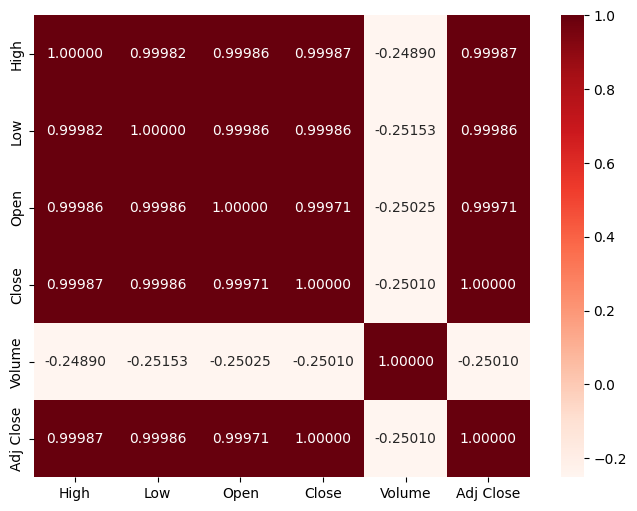

In [3]:
plotHeatMap(data.corr())

In [4]:
closeData = data["Close"].values

dataX = []
dataY = []

for i in range(1,len(closeData)):
    dataX.append(closeData[i-1:i])
    dataY.append(closeData[i])
    
dataX = np.array(dataX)
dataY = np.array(dataY)

In [5]:
tempX = pd.DataFrame(dataX,index=data.index[:-1],columns=["X values"])
tempY = pd.DataFrame(dataY,index=data.index[:-1],columns=["Y values"])

pd.concat([tempX,tempY,data[["Close"]][:-1]],axis=1).head()

,X values,Y values,Close
Date,,,
2002-05-23,1.196429,1.210000,1.196429
2002-05-24,1.210000,1.157143,1.210000
2002-05-28,1.157143,1.103571,1.157143
2002-05-29,1.103571,1.071429,1.103571
2002-05-30,1.071429,1.076429,1.071429


In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,train_size=0.7,shuffle=False)
len(X_train),len(X_test)

(3416, 1464)

In [7]:
linearModel = LinearRegression()
linearModel.fit(X_train,y_train)
linearPredicts=linearModel.predict(X_test)

In [8]:
svrLinearModel = SVR(kernel="linear")
svrLinearModel.fit(X_train,y_train)
svrLinearPredicts=svrLinearModel.predict(X_test)

In [9]:
treeModel = DecisionTreeRegressor()
treeModel.fit(X_train,y_train)
treePredicts=treeModel.predict(X_test)

In [10]:
knnModel = KNeighborsRegressor(n_neighbors=5)
knnModel.fit(X_train,y_train)
knnPredicts=knnModel.predict(X_test)

In [11]:
poly2Features = PolynomialFeatures(degree=2)
poly2Train = poly2Features.fit_transform(X_train)
poly2Test = poly2Features.transform(X_test)

poly2Model = LinearRegression()
poly2Model.fit(poly2Train,y_train)
poly2Predicts=poly2Model.predict(poly2Test)

In [12]:
poly3Features = PolynomialFeatures(degree=3)
poly3Train = poly3Features.fit_transform(X_train)
poly3Test = poly3Features.transform(X_test)

poly3Model = LinearRegression()
poly3Model.fit(poly3Train,y_train)
poly3Predicts=poly3Model.predict(poly3Test)

In [13]:
from tensorflow.keras import Model,layers,models,callbacks
import tensorflow as tf

In [14]:
kerasModel = models.Sequential([
    layers.Dense(input_shape=X_test.shape[1:],units=16,activation="linear"),
    layers.Dense(1)
])
kerasModel.compile(optimizer="adam",loss=tf.keras.losses.mean_squared_error)

In [15]:
history=kerasModel.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),
                      callbacks= [callbacks.EarlyStopping(patience=7)])

Epoch 1/100
107/107 [==============================] - 22s 7ms/step - loss: 61.7364 - val_loss: 83.9533
Epoch 2/100
107/107 [==============================] - 5s 48ms/step - loss: 1.0897 - val_loss: 72.8557
Epoch 3/100
107/107 [==============================] - 1s 5ms/step - loss: 1.0777 - val_loss: 72.1829
Epoch 4/100
107/107 [==============================] - 5s 49ms/step - loss: 1.0558 - val_loss: 70.1127
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 1.0513 - val_loss: 70.0049
Epoch 6/100
107/107 [==============================] - 5s 50ms/step - loss: 1.0423 - val_loss: 70.3375
Epoch 7/100
107/107 [==============================] - 0s 5ms/step - loss: 1.0467 - val_loss: 71.5231
Epoch 8/100
107/107 [==============================] - 6s 54ms/step - loss: 1.0312 - val_loss: 69.8396
Epoch 9/100
107/107 [==============================] - 1s 6ms/step - loss: 1.0281 - val_loss: 71.1170
Epoch 10/100
107/107 [==============================] - 6s 56ms/step - loss:

<AxesSubplot:>

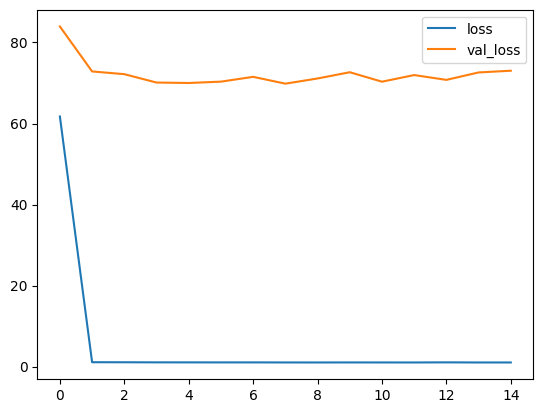

In [16]:
pd.DataFrame(history.history).plot()

In [17]:
artificalPredicteds=kerasModel.predict(X_test)

46/46 [==============================] - 0s 2ms/step


In [18]:
fraction=3

svrLinearMSEScore = round(mean_squared_error(y_test,svrLinearPredicts), fraction)
knnMSEScore = round(mean_squared_error(y_test,knnPredicts), fraction)
treeMSEScore = round(mean_squared_error(y_test,treePredicts), fraction)
linearMSEScore = round(mean_squared_error(y_test,linearPredicts), fraction)
poly2MSEScore = round(mean_squared_error(y_test,poly2Predicts), fraction)
poly3MSEScore = round(mean_squared_error(y_test,poly3Predicts), fraction)
artificalMSEScore = round(mean_squared_error(y_test,artificalPredicteds), fraction)


svrLinearR2Score = round(r2_score(y_test,svrLinearPredicts), fraction)
knnR2Score = round(r2_score(y_test,knnPredicts), fraction)
treeR2Score = round(r2_score(y_test,treePredicts), fraction)
linearR2Score = round(r2_score(y_test,linearPredicts), fraction)
poly2R2Score = round(r2_score(y_test,poly2Predicts), fraction)
poly3R2Score = round(r2_score(y_test,poly3Predicts), fraction)
artificalR2Score = round(r2_score(y_test,artificalPredicteds), fraction)

In [19]:

items = [
    ItemRegression(svrLinearPredicts, svrLinearR2Score, svrLinearMSEScore, label="SVR Linear",
                   title="SVR Linear Model test dataset predict result"),
    
    ItemRegression(knnPredicts, knnR2Score, knnMSEScore, label="KNN",
                   title="KNN Regressor Model test dataset predict result"),
    
    ItemRegression(treePredicts, treeR2Score, treeMSEScore, label="Decision Tree",
                   title="Decision Tree Regressor Model test dataset predict result"),
    
    ItemRegression(linearPredicts, linearR2Score, linearMSEScore, label="Linear",
                   title="Linear Model test dataset predict result"),
    
    ItemRegression(poly2Predicts, poly2R2Score, poly2MSEScore, label="Poly2",
                   title="Polynomial 2 degree linear model test dataset predict result"),
    
    ItemRegression(poly3Predicts, poly3R2Score, poly3MSEScore, label="Poly3",
                   title="Polynomial 3 degree linear model test dataset predict result"),
    
    ItemRegression(artificalPredicteds, artificalR2Score, artificalMSEScore, label="Artifical",
                   title="Artifical model test dataset predict result")
]

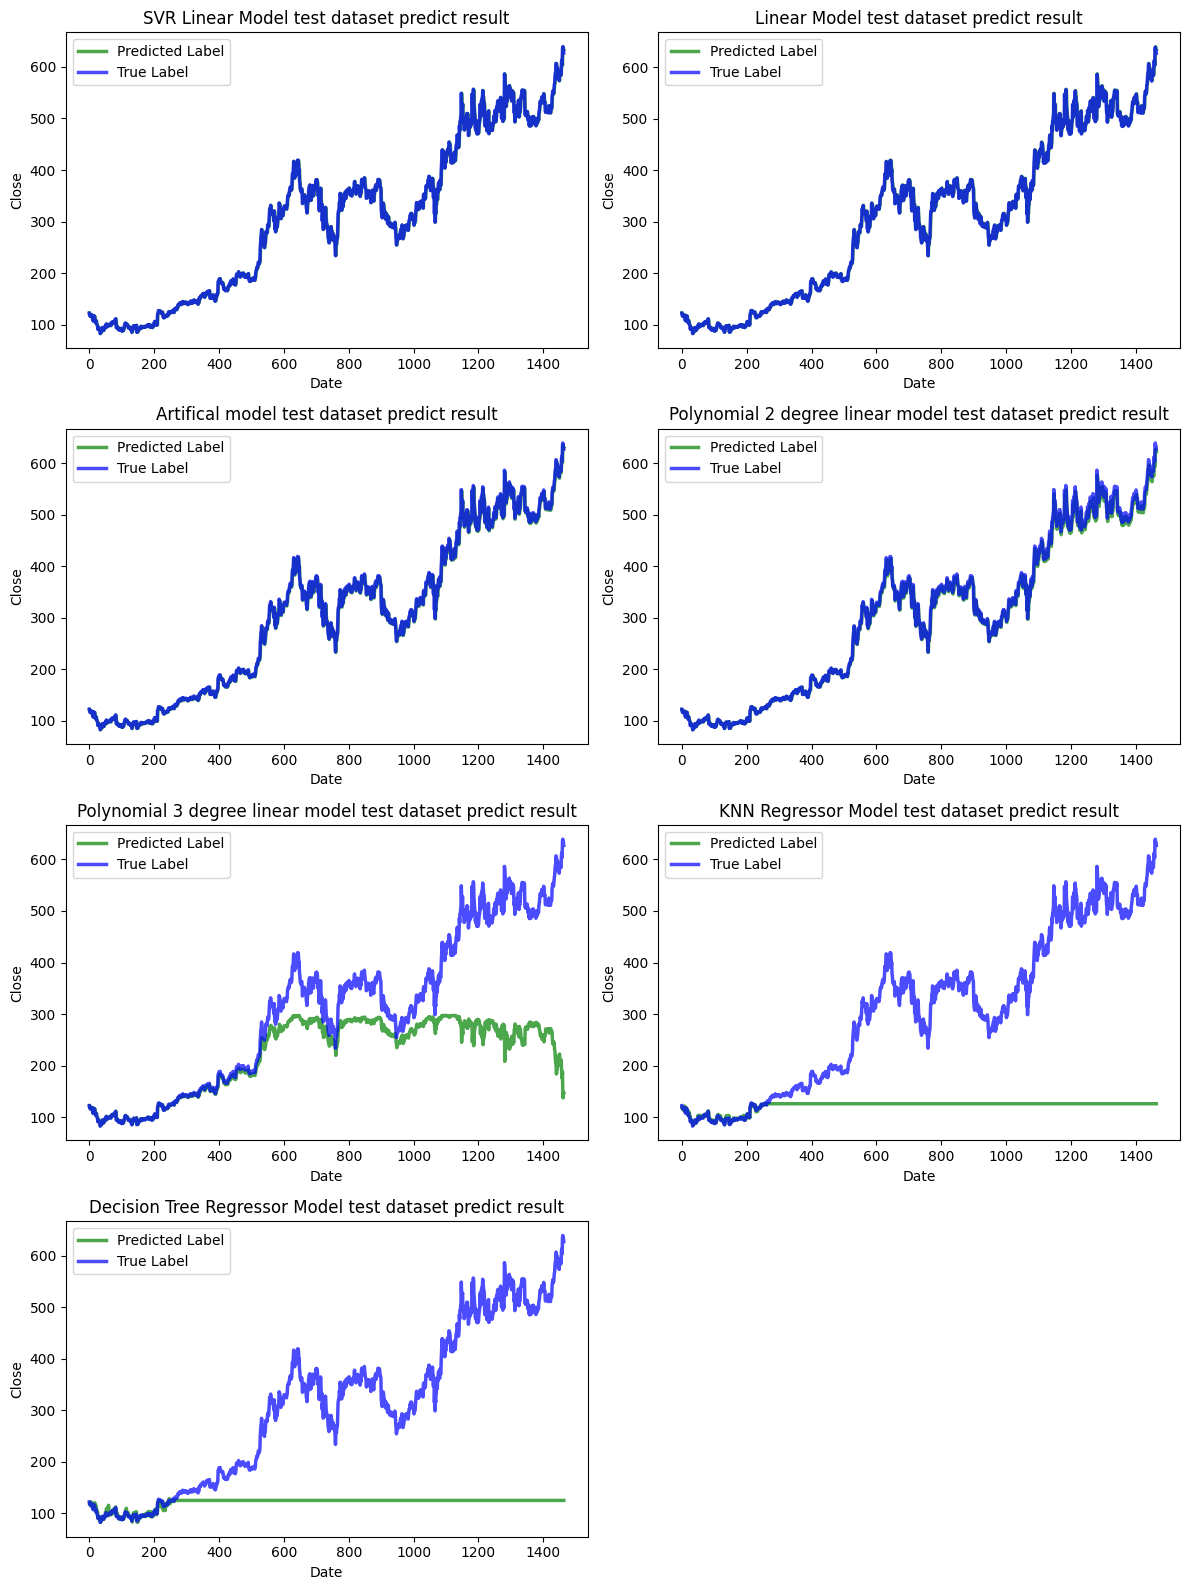

In [20]:
plotTrueAndPredicts(items,y_test)

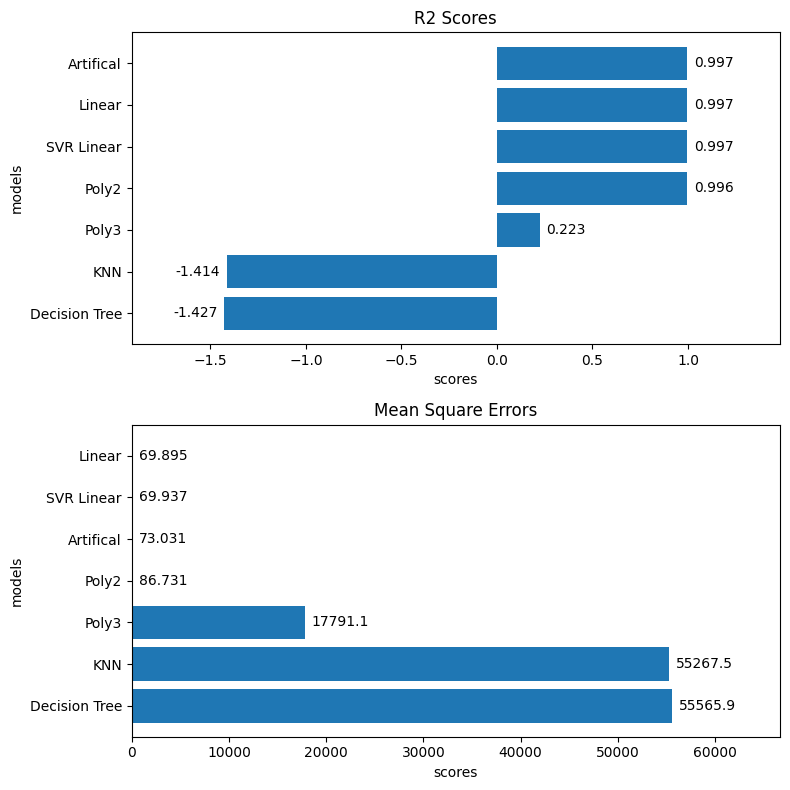

In [21]:
plotRegressionScoreBars(items)

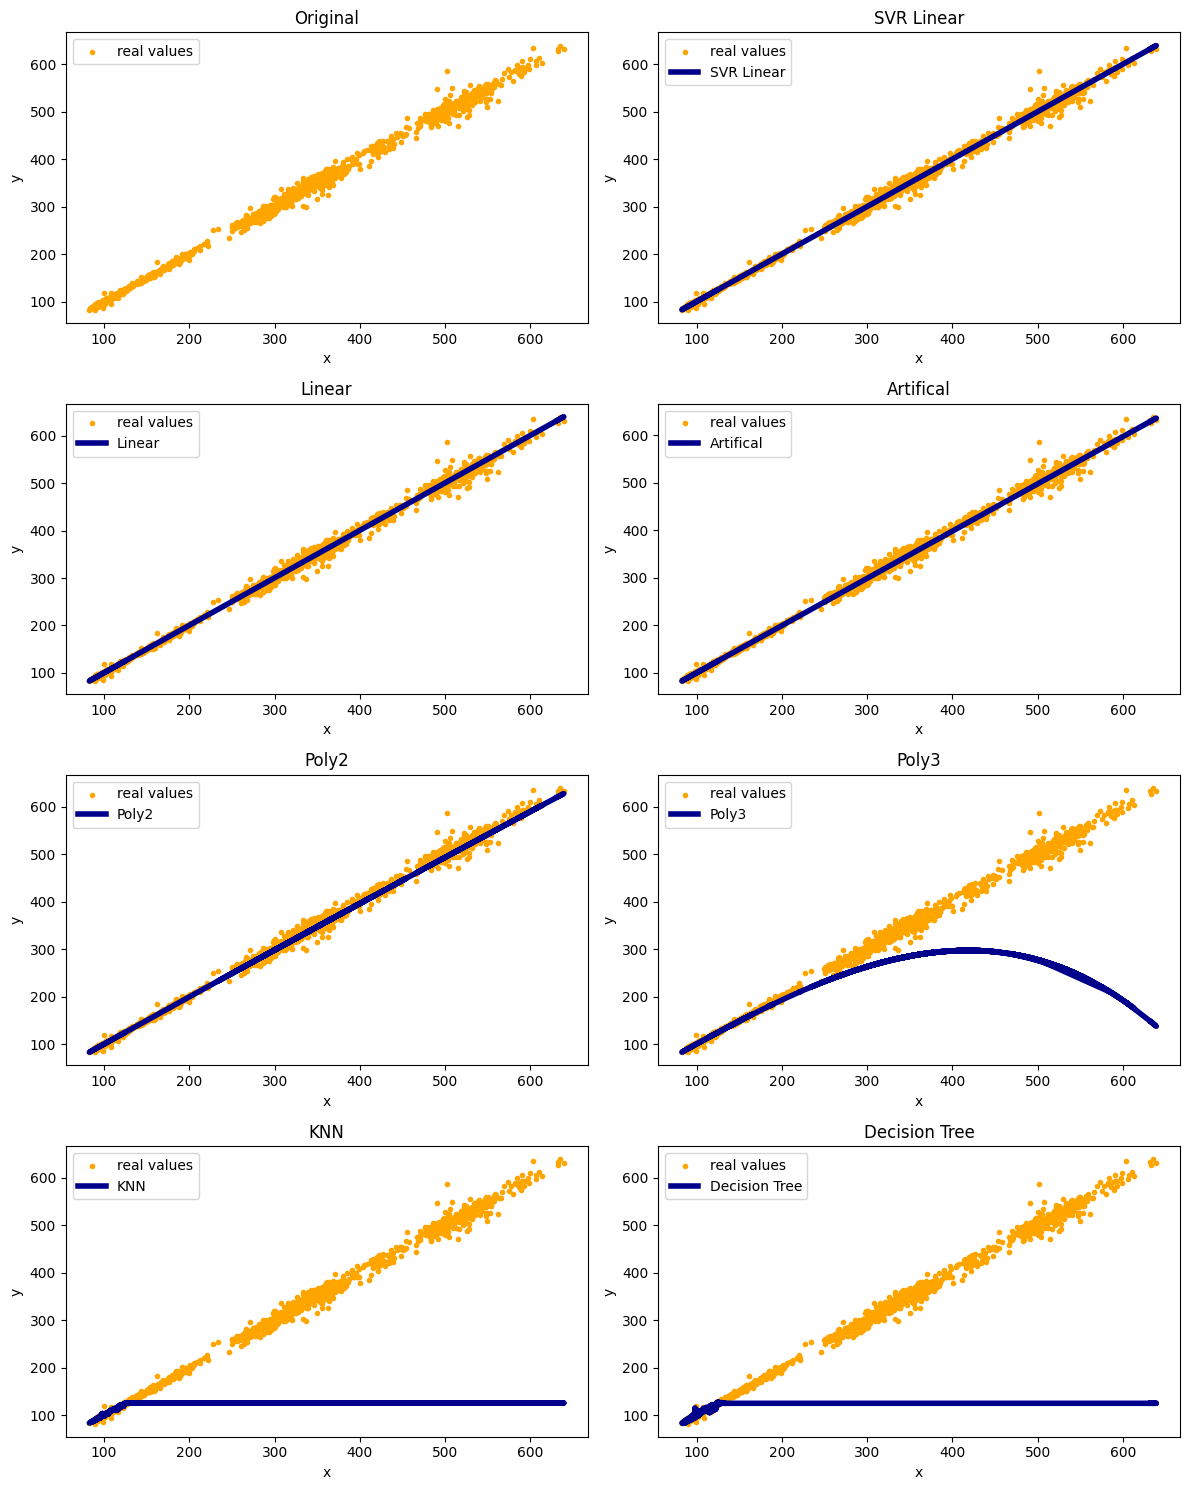

In [22]:
plotPredicts(items,X_test,y_test)